### **Imported Libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(color_codes=True)

### **Data Loading**

**About Dataset**

In this notebook, we will be working on History dataset.


*History Table:*
Table containing the list of all the histories within each contract, including ID_HISTORIQUE, DATE_ACTION, ACTION, T_TABLE, ID_ENREGISTREMENT, LOGIN_USER, IP_PC, NOM_PC, REF_CTR_HIST, REF_IND_HIST and ABREV_ROLE_HIST.
.


**Related Attributes**

*History Table:*

| ID_HISTORIQUE     | Reference   Historique               | int         |
|-------------------|--------------------------------------|-------------|
| DATE_ACTION       | Date Action                          | datetime    |
| ACTION            | Action                               | varchar(50) |
| T_TABLE           | Nom de la table                      | varchar(50) |
| ID_ENREGISTREMENT | Ref Enregistrement                   | varchar(20) |
| LOGIN_USER        | Login de   l'utilisateur             | varchar(50) |
| IP_PC             | Adresse IP de   L'utilisateur        | varchar(20) |
| NOM_PC            | Nom du PC de   l'utilisateur         | varchar(50) |
| REF_CTR_HIST      | Reference Contrat                    | varchar(20) |
| REF_IND_HIST      | Reference de   l'individu            | varchar(20) |
| ABREV_ROLE_HIST   | Role de l'individu   dans le contrat | varchar(5)  |

In [41]:
# Loading data into dataframe
his_data = pd.read_csv('T_HISTORIQUE.csv', parse_dates=['DATE_ACTION'])

In [42]:
# Displaying first 5 rows
his_data.head(10)

,ID_HISTORIQUE,DATE_ACTION,ACTION,T_TABLE,ID_ENREGISTREMENT,LOGIN_USER,IP_PC,NOM_PC,REF_CTR_HIST,REF_IND_HIST,ABREV_ROLE_HIST,ID_HISTORIQUEE
0,0,2019-11-01,Ajout,TR_TMM,198,1,192.168.49.151,SRVXFACTORWEB,NaN,NaN,NaN,3
1,0,2019-11-22,Modification,T_DET_BORD,31004,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN,4
2,0,2019-11-22,Modification,TJ_DOCUMENT_DET_BORD,10955,30,192.168.49.151,SRVXFACTORWEB,95.0,NaN,NaN,5
3,0,2019-11-22,Modification,T_DET_BORD,31005,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN,6
4,0,2019-11-22,Modification,TJ_DOCUMENT_DET_BORD,10956,30,192.168.49.151,SRVXFACTORWEB,95.0,NaN,NaN,7
5,0,2019-11-26,Modification,T_DET_BORD,30330,30,192.168.49.151,SRVXFACTORWEB,45.0,30.0,NaN,8
6,0,2019-11-26,Modification,TJ_DOCUMENT_DET_BORD,10238,30,192.168.49.151,SRVXFACTORWEB,45.0,NaN,NaN,9
7,0,2019-12-02,Ajout,TR_TMM,266,1,192.168.49.151,SRVXFACTORWEB,NaN,NaN,NaN,10
8,0,2020-01-03,Ajout,TR_TMM,267,1,192.168.49.151,SRVXFACTORWEB,NaN,NaN,NaN,11
9,0,2020-01-13,Réconsiliation,TJ_LETTRAGE,11574,azzouz,10.2.115.10,10.2.115.10,64.0,12.0,Réconsiliation 64,12


### **EDA - Exploratory Data Analysis**

##### **History Table**

In [43]:
# Checking history dataset dimension (shape)
his_data.shape

(12812, 12)

The dataset holds **12** columns with **12812** observations

In [44]:
# Returning all the datatypes used in the dataset
his_data.dtypes

ID_HISTORIQUE                 int64
DATE_ACTION          datetime64[ns]
ACTION                       object
T_TABLE                      object
ID_ENREGISTREMENT            object
LOGIN_USER                   object
IP_PC                        object
NOM_PC                       object
REF_CTR_HIST                float64
REF_IND_HIST                float64
ABREV_ROLE_HIST              object
ID_HISTORIQUEE                int64
dtype: object

The dataset, as it's mentioning, revolves around 4 types: 7 objects, 2 int64, 2 float64 and 1 datetime64[ns] (**4** numerical attributes and **8** categorical attributes). Actually, most of the fields are categorical, we won't be dealing with most of them

In [45]:
# Getting more statistical details
his_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_HISTORIQUE,12812.0,0.078286,8.861199,0.0,0.00,0.0,0.00,1003.0
REF_CTR_HIST,12764.0,120.453228,279.835317,0.0,50.00,66.0,125.00,3135.0
REF_IND_HIST,12775.0,667.963601,743.432354,1.0,202.00,442.0,1097.00,4159.0
ID_HISTORIQUEE,12812.0,6908.615673,4170.056172,3.0,3205.75,6789.5,10488.25,18298.0


The table presents descriptive statistics for four fields: "ID_HISTORIQUE," "REF_CTR_HIST," "REF_IND_HIST," and "ID_HISTORIQUEE." 

Given the values and ranges of these fields, they are likely identifiers, such as primary and foreign keys, used to link records to other tables in the database. As they do not contain meaningful data for direct analysis or insights, they may not be directly useful in extracting insights or patterns from the data.

In [46]:
# Checking missing values
his_data.isna().sum()

ID_HISTORIQUE         0
DATE_ACTION           0
ACTION                0
T_TABLE               0
ID_ENREGISTREMENT     0
LOGIN_USER            2
IP_PC                 1
NOM_PC                1
REF_CTR_HIST         48
REF_IND_HIST         37
ABREV_ROLE_HIST      52
ID_HISTORIQUEE        0
dtype: int64

In the dataset, several fields have missing values including :
- LOGIN_USER            2
- IP_PC                 1
- NOM_PC                1
- REF_CTR_HIST         48
- REF_IND_HIST         37
- ABREV_ROLE_HIST      52

Among all of these fields, I think the most important one for our purpose is ABREV_ROLE_HIST

In [47]:
# Check the number of unique value from all of the object datatype
his_data[['ACTION', 'ABREV_ROLE_HIST']].nunique()

ACTION               23
ABREV_ROLE_HIST    8633
dtype: int64

In [48]:
# Check the unique values from all of the object datatype
his_data['ACTION'].unique()

array(['Ajout', 'Modification', 'Réconsiliation', 'Creation Encaissement',
       'Numérisation_des_documents', 'Creation bordereau',
       'Valider bordereau', 'Saisi limite', 'Edit Individu',
       'Annuler encaissement', 'AnuulerTache', 'Validation_des_documents',
       'Rejeter bordereau', 'Lettrage', 'Creation Groupe',
       'DELETE T_MVT_CREDIT', 'Connexion', 'Déconnexion',
       'Résolution Impaye ', 'Anulation de réconciliation',
       'Annulation Réconsiliation ', 'Creation Deblocage FDG',
       'Réconciliation'], dtype=object)

In [49]:
his_data['ABREV_ROLE_HIST'].unique()

array([nan, 'Réconsiliation 64', 'Réconsiliation 100', ...,
       'Valider bordereau 2', ' Déconnexion SBR0519',
       'Creation bordereau 3'], dtype=object)

[2871, 2401, 2018, 1764, 1266, 907, 529, 426, 351, 279]
['Ajout', 'Modification', 'Réconsiliation', 'Creation Encaissement', 'Numérisation_des_documents', 'Creation bordereau', 'Valider bordereau', 'Saisi limite', 'Edit Individu', 'Others']


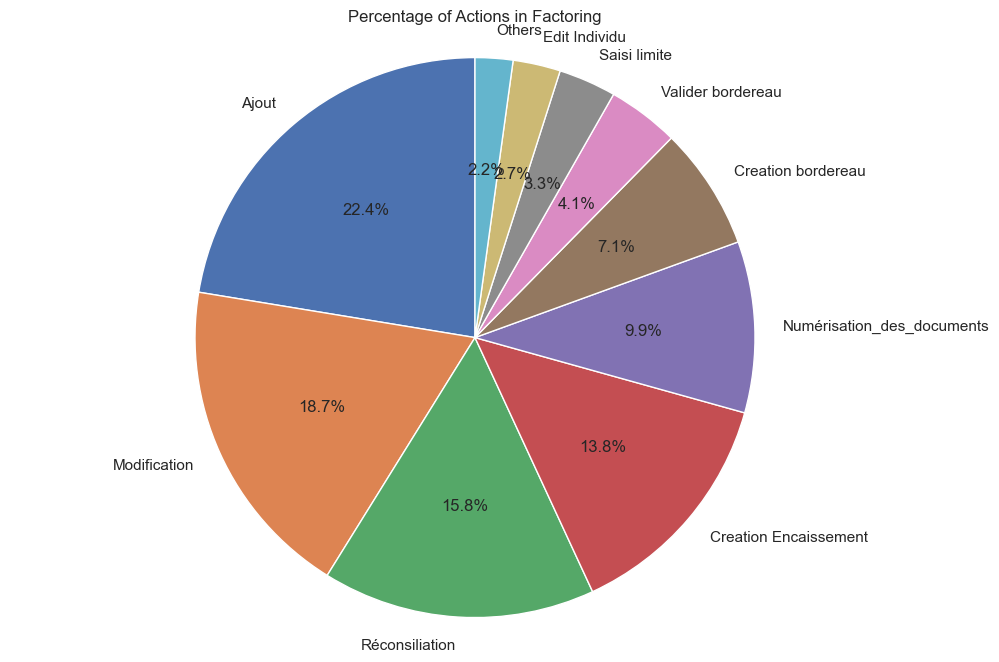

In [50]:
# Sample data for the "ACTION" field
actions = list(his_data['ACTION'].unique())[:9]
actions.append('Others')

# Sample counts for each action
action_counts = list(his_data['ACTION'].value_counts())
filtered_counts = action_counts[:9]
filtered_counts.append(sum(action_counts[9:]))
filtered_counts.sort(reverse=True)
print(filtered_counts)
print(actions)
# Create the pie chart with percentage values
plt.figure(figsize=(12, 8))
plt.pie(filtered_counts, labels=actions, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Percentage of Actions in Factoring')

# Display the pie chart
plt.show()

In [51]:
# Group the data by 'REF_HIST_CTR' and count the occurrences of each action
action_counts = his_data.groupby(['REF_CTR_HIST', 'ACTION']).size().reset_index(name='COUNT')

# Print the actions for each REF_HIST_CTR along with the total number of actions
for ref_ctr, action, count in zip(action_counts['REF_CTR_HIST'], action_counts['ACTION'], action_counts['COUNT']):
    print(f"REF_CTR_HIST {ref_ctr}: {action} - {count} times")

REF_CTR_HIST 0.0: Creation Encaissement - 3 times
REF_CTR_HIST 1.0: Creation Groupe - 1 times
REF_CTR_HIST 9.0: Annuler encaissement - 3 times
REF_CTR_HIST 9.0: AnuulerTache - 3 times
REF_CTR_HIST 9.0: Connexion - 15 times
REF_CTR_HIST 9.0: Creation Encaissement - 3 times
REF_CTR_HIST 9.0: Déconnexion - 10 times
REF_CTR_HIST 10.0: Connexion - 11 times
REF_CTR_HIST 10.0: Déconnexion - 10 times
REF_CTR_HIST 20.0: Connexion - 1 times
REF_CTR_HIST 20.0: Déconnexion - 1 times
REF_CTR_HIST 22.0: Creation bordereau - 2 times
REF_CTR_HIST 22.0: Valider bordereau - 2 times
REF_CTR_HIST 27.0: Creation Encaissement - 2 times
REF_CTR_HIST 27.0: Creation bordereau - 1 times
REF_CTR_HIST 27.0: Lettrage - 2 times
REF_CTR_HIST 27.0: Numérisation_des_documents - 6 times
REF_CTR_HIST 27.0: Réconsiliation - 2 times
REF_CTR_HIST 27.0: Saisi limite - 1 times
REF_CTR_HIST 27.0: Validation_des_documents - 3 times
REF_CTR_HIST 27.0: Valider bordereau - 1 times
REF_CTR_HIST 35.0: Annuler encaissement - 1 times

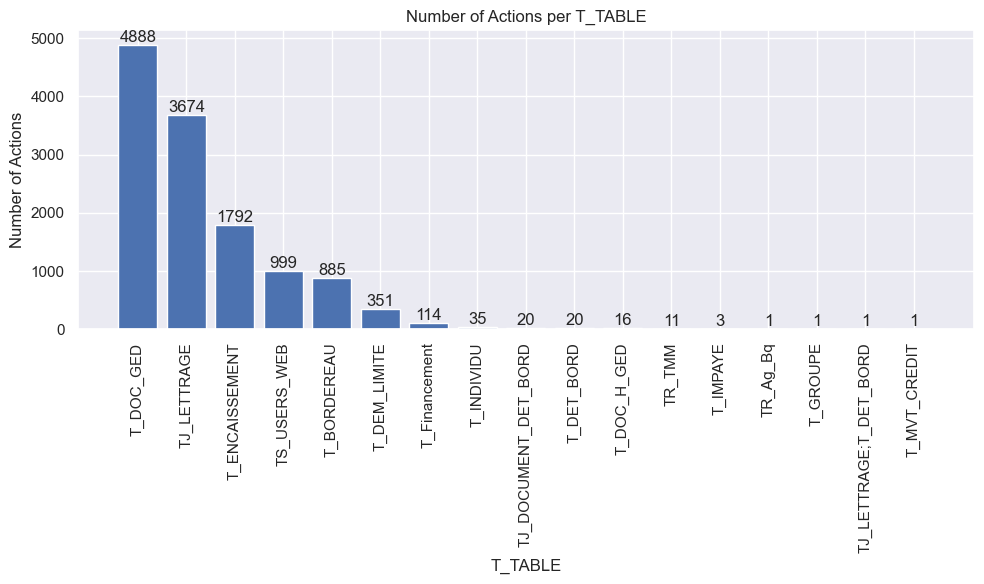

In [52]:
# Group the data by 'T_TABLE' and count the number of occurrences of each action
table_action_counts = his_data.groupby('T_TABLE')['ACTION'].size().reset_index(name='COUNT')

# Sort the data by the number of actions in descending order
table_action_counts = table_action_counts.sort_values(by='COUNT', ascending=False)

# Create a bar chart to display the number of actions per T_TABLE
plt.figure(figsize=(10, 6))
bars = plt.bar(table_action_counts['T_TABLE'], table_action_counts['COUNT'])
plt.xlabel('T_TABLE')
plt.ylabel('Number of Actions')
plt.title('Number of Actions per T_TABLE')
plt.xticks(rotation=90) 

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

This bar chart will provide a clear visual representation of the number of actions associated with each T_TABLE, allowing us to identify which tables have the highest and lowest number of actions.

### **Data Cleaning**

The cleaning phase in data preprocessing is crucial for ensuring data quality and reliability in any data analysis or machine learning project.

##### **Cleaning Worktools**

This section handles all the preparation methods for dealing with missing values and any unreliable data.

In [53]:
def drop_columns(dataframe, columns_to_drop):
    """
    Drop one or multiple columns from a DataFrame.
    
    Parameters:
        dataframe: The input DataFrame.
        columns_to_drop (str or list of str): The column name(s) to drop.
        
    Returns:
        pd.DataFrame: The DataFrame with the specified columns dropped.
    """
    if isinstance(columns_to_drop, str):
        columns_to_drop = [columns_to_drop]

    return dataframe.drop(columns=columns_to_drop, axis=1)


This method works on dropping the whole column(s) from the dataframe. It's going to be used once we encounter one or multiple fields that are fully null or most of the rows are null.

In [54]:
def drop_nan_rows(dataframe, subset):
    """
    Drop rows that contain NaN/NaT or all blank values (spaces) in the DataFrame.
    
    Parameters:
        dataframe: The input DataFrame.
        subset (list of str): The column names to consider when dropping rows.
        
    Returns:
        pd.DataFrame: The DataFrame with rows containing NaN or NaT values dropped.
    """
    # Drop rows with any NaN or NaT values
    dataframe = dataframe.dropna(subset=subset)

    # Drop rows where all values are blank spaces
    condition = dataframe.apply(lambda row: row.str.strip().eq('')).all(axis=1)
    dataframe = dataframe[~condition]

    return dataframe

This method serves to removing just a number of rows within a subset of fields that contains null values (NaN, NaT) or blank values.

In [55]:
def fill_missing_values(dataframe):
    """
    Replace missing values in a DataFrame with appropriate fill values based on data type.
    
    For numerical columns, the missing values will be filled with the median.
    For categorical columns, the missing values will be filled with the most frequent value.
    
    Parameters:
        dataframe: The input DataFrame.
        
    Returns:
        The DataFrame with missing values replaced.
    """
    # Replace blank spaces with NaN
    dataframe = dataframe.replace('', np.nan)
    
    # Fill missing values in numerical columns with the median
    numeric_columns = dataframe.select_dtypes(include=[np.number])
    dataframe[numeric_columns.columns] = dataframe[numeric_columns.columns].fillna(numeric_columns.median())
    
    # Fill missing values in categorical columns with the most frequent value
    categorical_columns = dataframe.select_dtypes(include=['object'])
    dataframe[categorical_columns.columns] = dataframe[categorical_columns.columns].fillna(categorical_columns.mode().iloc[0])
    
    return dataframe


This method is being defined to replace missing values in a DataFrame with appropriate fill values based on data type. As a choice, we are tending to replace the numerical columns with the median and the categorical columns with the most frequent values (the mode, statistically speaking)


In [56]:
def switch_if_negative_diff(dataframe, dt1, dt2):
    """
    Switches the values of datetime1 (dt1) and datetime2 (dt2) in the dataframe
    if datetime1 is greater than datetime2.

    Args:
        dataframe: the dataframe containing 'datetime1' and 'datetime2' columns.
        dt1 (str): the field's name representing the first datetime
        dt2 (str): the field's name representing the second datetime

    Returns:
        The permuted dataframe with switched datetime values if applicable.
    """
    mask = dataframe[dt1] > dataframe[dt2]
    dataframe.loc[mask, [dt1, dt2]] = dataframe.loc[mask, [dt2, dt1]].values
    dataframe[dt1] = dataframe[dt1].apply(pd.to_datetime)
    dataframe[dt2] = dataframe[dt2].apply(pd.to_datetime)
    return dataframe

The role of this method is toggling between 2 datetimes that have negative differential.

In [57]:
def interpolate_datetime_nulls(dataframe, column_name):
    """
    Replace null datetime values in a DataFrame column using time-based interpolation.

    Parameters:
        dataframe: The DataFrame containing the column with null datetime values.
        column_name (str): The name of the column with datetime values to interpolate.

    Returns:
        The DataFrame with null datetime values replaced by interpolated values.
    """
    # Convert the specified column to datetime dtype
    dataframe[column_name] = pd.to_datetime(dataframe[column_name])

    # Perform interpolation for missing values using 'bfill' method
    dataframe[column_name] = dataframe[column_name].fillna(method='bfill')

    # Perform interpolation for missing values using 'ffill' method
    dataframe[column_name] = dataframe[column_name].fillna(method='ffill')
    
    return dataframe

This method takes a DataFrame and the name of the column with datetime values that need interpolation. Interpolation is a mathematical method that estimates the missing values based on the known values surrounding them.

Pandas provides the `interpolate()` method, which can be used to perform linear or time-based interpolation on datetime columns.

The resulting DataFrame will have the null datetime values replaced with interpolated values based on the surrounding known values and the time differences between them.

In [58]:
def fetch_nan_columns(dataframe, threshold = 0.5):
    """
    Fetches the null columns and Separates the most nullified columns for the others.

    Parameters:
        dataframe: The DataFrame containing the column with null values.
        threshold (float): A metric with which we separate the dataframe 
                           based upon holding missing values.

    Returns:
        Two lists of columns names.
    """
    # Store the number of null values within a dataframe df
    df = pd.DataFrame(dataframe.isna().sum(), columns=['Nb_null'])

    # Separate the number of nuls that surpass the length of the dataframe
    cols_to_drop = df[df['Nb_null'] > dataframe.shape[0] * threshold]

    # Separate the number of nuls that are less than the length of the dataframe except 0
    cols_to_manipulate_nan = df[(df['Nb_null'] <= dataframe.shape[0] * threshold) & (df['Nb_null'] > 0)]

    # Return just the name of columns
    return cols_to_drop.index, cols_to_manipulate_nan.index

This method stands out as a way of retrieving the columns that have missing values

In [59]:
def fill_missing_values_subset(dataframe, subset_columns):
    """
    Replace missing values in a subset of columns of a DataFrame with appropriate fill values based on data type.

    For numerical columns, the missing values will be filled with the median.
    For categorical columns, the missing values will be filled with the most frequent value.

    Args:
        dataframe: The input DataFrame.
        subset_columns: List of column names to fill missing values in.

    Returns:
        The DataFrame with missing values replaced for the specified subset of columns.
    """
    # Fill missing values in numerical columns of the subset with the median
    numeric_columns = dataframe[subset_columns].select_dtypes(include=[np.number])
    dataframe[numeric_columns.columns] = dataframe[numeric_columns.columns].fillna(numeric_columns.median())

    # Fill missing values in categorical columns of the subset with the most frequent value
    categorical_columns = dataframe[subset_columns].select_dtypes(include=['object'])
    dataframe[categorical_columns.columns] = dataframe[categorical_columns.columns].fillna(categorical_columns.mode().iloc[0])

    return dataframe

This method replaces missing values in a subset of columns of a DataFrame with appropriate fill values based on data type.

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

def replace_nan_with_knn_classifier(dataframe, target_column, n_neighbors=5):
    """
    Replace NaN values in the target column of the DataFrame using k-Nearest Neighbors (k-NN) classification for prediction.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the column containing NaN values to be predicted. Default is 'LOGIN_USER'.
        n_neighbors (int): The number of neighbors to consider for k-NN classification. Default is 5.

    Returns:
        pd.DataFrame: The DataFrame with NaN values in the specified column replaced with predicted values.
    """
    # Make a copy of the original DataFrame
    df_copy = dataframe.copy()

    # Store the data types of datetime columns for conversion back after label encoding
    datetime_columns = df_copy.select_dtypes(include='datetime64').columns

    # Drop datetime columns temporarily
    df_copy.drop(columns=datetime_columns, inplace=True)

    # Label encode all the categorical columns
    label_encoder = LabelEncoder()
    for col in df_copy.select_dtypes(include='object'):
        df_copy[col] = label_encoder.fit_transform(df_copy[col].astype(str))

    # Separate the DataFrame into null and non-null values in the target column
    df_not_null = df_copy.dropna(subset=[target_column])
    df_null = df_copy[df_copy[target_column].isnull()]

    # Check if there are non-null values in the target column
    if len(df_not_null) == 0:
        raise ValueError("No non-null values found in the target column.")

    # Features and target for non-null values
    features_not_null = df_not_null.drop(target_column, axis=1)
    target_not_null = df_not_null[target_column]

    # Fit the non-null values to the k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(features_not_null, target_not_null)

    # Reorder columns in df_null to match the order of features_not_null
    df_null_reordered = df_null[features_not_null.columns]
    print(df_null.head())
    print(len(df_null) > 0)
    # Check if there are any null values to predict
    if len(df_null) > 0:
        # Predict the null values in the target column
        predicted_labels = knn_classifier.predict(df_null_reordered)

        # Convert the predicted labels back to original categorical values using the original label encoder
        predicted_values = label_encoder.inverse_transform(predicted_labels)
        print(predicted_values)
        # Replace NaN values in the target column with predicted values
        df_copy.loc[df_copy[target_column].isnull(), target_column] = predicted_values

    # Convert the target column back to the original labels
    for col in df_copy.select_dtypes(include='object'):
        df_copy[col] = label_encoder.inverse_transform(df_copy[col])

    # Restore the datetime columns
    for col in datetime_columns:
        df_copy[col] = dataframe[col]

    return df_copy


This method works on replacing NaN values in a specific column of the DataFrame using k-Nearest Neighbors (k-NN) imputation.

In [61]:
def replace_label_encoded_values(df_encoded, df_categorical, target_column):
    """
    Replace label encoded values in the DataFrame 'df_encoded' with the corresponding categorical values from 'df_categorical'.

    Parameters:
        df_encoded (pd.DataFrame): The DataFrame containing label encoded values to be replaced.
        df_categorical (pd.DataFrame): The DataFrame containing the corresponding categorical values.
        target_column (str): The name of the target column to replace the values.

    Returns:
        pd.DataFrame: The DataFrame 'df_encoded' with the label encoded values replaced by the categorical values.
    """
    # Create a mapping dictionary to store label encoded values and their corresponding alphabetical values
    mapping = {}

    # Iterate over the target column in both DataFrames simultaneously
    for encoded_val, categorical_val in zip(df_encoded[target_column], df_categorical[target_column]):
        if not pd.isna(encoded_val) and not pd.isna(categorical_val):
            # Store the mapping of label encoded value to the corresponding alphabetical value
            mapping[encoded_val] = categorical_val

    # Replace label encoded values with their corresponding categorical values
    df_encoded[target_column] = df_encoded[target_column].replace(mapping)

    return df_encoded


##### **History Table**

In [62]:
cols_to_drop, cols_to_inpute = fetch_nan_columns(his_data)
his_data[cols_to_drop].isna().sum()

Series([], dtype: float64)

In [63]:
his_data[cols_to_inpute].isna().sum()

LOGIN_USER          2
IP_PC               1
NOM_PC              1
REF_CTR_HIST       48
REF_IND_HIST       37
ABREV_ROLE_HIST    52
dtype: int64

Just stored the columns that are going to be fully dropped in cols_to_drop and the rest of the columns that have some null values in cols_to_inpute

In [64]:
his_data.head(10)

,ID_HISTORIQUE,DATE_ACTION,ACTION,T_TABLE,ID_ENREGISTREMENT,LOGIN_USER,IP_PC,NOM_PC,REF_CTR_HIST,REF_IND_HIST,ABREV_ROLE_HIST,ID_HISTORIQUEE
0,0,2019-11-01,Ajout,TR_TMM,198,1,192.168.49.151,SRVXFACTORWEB,NaN,NaN,NaN,3
1,0,2019-11-22,Modification,T_DET_BORD,31004,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN,4
2,0,2019-11-22,Modification,TJ_DOCUMENT_DET_BORD,10955,30,192.168.49.151,SRVXFACTORWEB,95.0,NaN,NaN,5
3,0,2019-11-22,Modification,T_DET_BORD,31005,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN,6
4,0,2019-11-22,Modification,TJ_DOCUMENT_DET_BORD,10956,30,192.168.49.151,SRVXFACTORWEB,95.0,NaN,NaN,7
5,0,2019-11-26,Modification,T_DET_BORD,30330,30,192.168.49.151,SRVXFACTORWEB,45.0,30.0,NaN,8
6,0,2019-11-26,Modification,TJ_DOCUMENT_DET_BORD,10238,30,192.168.49.151,SRVXFACTORWEB,45.0,NaN,NaN,9
7,0,2019-12-02,Ajout,TR_TMM,266,1,192.168.49.151,SRVXFACTORWEB,NaN,NaN,NaN,10
8,0,2020-01-03,Ajout,TR_TMM,267,1,192.168.49.151,SRVXFACTORWEB,NaN,NaN,NaN,11
9,0,2020-01-13,Réconsiliation,TJ_LETTRAGE,11574,azzouz,10.2.115.10,10.2.115.10,64.0,12.0,Réconsiliation 64,12


We notice that there are two columns of ID_HISTORIQUE. It's been duplicated as there is an extra 'E' in the name of the second column, for this reason it's been counted as a new field. It might be also for you that ID_HISTORIQUE is fully filled with zeros whereas ID_HISTORIQUEE is well presented in terms of values. So, the first will be dropped off.

In [65]:
# Drop the 'ID_HISTORIQUE' column
his_data.drop(columns='ID_HISTORIQUE', inplace=True)

# Rename 'ID_HISTORIQUEE' to 'ID_HISTORIQUE'
his_data.rename(columns={'ID_HISTORIQUEE': 'ID_HISTORIQUE'}, inplace=True)

# Inspect the output 
his_data.columns

Index(['DATE_ACTION', 'ACTION', 'T_TABLE', 'ID_ENREGISTREMENT', 'LOGIN_USER',
       'IP_PC', 'NOM_PC', 'REF_CTR_HIST', 'REF_IND_HIST', 'ABREV_ROLE_HIST',
       'ID_HISTORIQUE'],
      dtype='object')

In [66]:
# Inspect all the columns that contain null values in each row
his_data[his_data.isna().any(axis=1)][cols_to_inpute]

,LOGIN_USER,IP_PC,NOM_PC,REF_CTR_HIST,REF_IND_HIST,ABREV_ROLE_HIST
0,1,192.168.49.151,SRVXFACTORWEB,NaN,NaN,NaN
1,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN
2,30,192.168.49.151,SRVXFACTORWEB,95.0,NaN,NaN
3,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN
4,30,192.168.49.151,SRVXFACTORWEB,95.0,NaN,NaN
...,...,...,...,...,...,...
12725,Admin,196.224.34.198,196.224.34.198,NaN,18.0,Edit individuMBG
12735,Admin,51.210.243.165,51.210.243.165,0.0,NaN,Creation Encaissement 6521565
12789,Admin,196.179.208.180,196.179.208.180,1.0,NaN,Creation GroupePoulina
12805,Admin,161.97.70.2,161.97.70.2,NaN,4158.0,Edit individuGeant


To impute the null values, I tend to:
1. unify NOM_PC to hold just SRVXFACTORWEB
2. cast REF_CTR_HIST and REF_IND_HIST to object (str), so that I manage to replace all the NaNs with the most frequent values (mode). IP_PC will be imputed with the mode as well
3. replace the NaNs in ABREF_ROLE_HIST with strings caused by the concatenation of ACTION and REF_CTR_HIST
4. find the correlation between T_TABLE and LOGIN_USER to help in filling out the anomalies

In [67]:
# Update the values in the "NOM_PC" column
his_data.loc[:, 'NOM_PC'] = 'SRVXFACTORWEB'
his_data['NOM_PC'].unique()

array(['SRVXFACTORWEB'], dtype=object)

In [68]:
# Cast REF_CTR_HIST and REF_IND_HIST to object data type (string)
his_data['REF_CTR_HIST'] = his_data['REF_CTR_HIST'].astype(str)
his_data['REF_IND_HIST'] = his_data['REF_IND_HIST'].astype(str)
his_data['REF_IND_HIST'] = his_data['REF_IND_HIST'].replace('nan', np.nan)
his_data['REF_CTR_HIST'] = his_data['REF_CTR_HIST'].replace('nan', np.nan)

# Fill missing values
his_data = fill_missing_values_subset(his_data, ['REF_CTR_HIST', 'REF_IND_HIST', 'IP_PC'])
his_data.isna().sum()

DATE_ACTION           0
ACTION                0
T_TABLE               0
ID_ENREGISTREMENT     0
LOGIN_USER            2
IP_PC                 0
NOM_PC                0
REF_CTR_HIST          0
REF_IND_HIST          0
ABREV_ROLE_HIST      52
ID_HISTORIQUE         0
dtype: int64

In [69]:
# Inspect all the columns that contain null values in each row
his_data[his_data.isna().any(axis=1)][cols_to_inpute].head(10)

,LOGIN_USER,IP_PC,NOM_PC,REF_CTR_HIST,REF_IND_HIST,ABREV_ROLE_HIST
0,1,192.168.49.151,SRVXFACTORWEB,125.0,232.0,NaN
1,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN
2,30,192.168.49.151,SRVXFACTORWEB,95.0,232.0,NaN
3,30,192.168.49.151,SRVXFACTORWEB,95.0,975.0,NaN
4,30,192.168.49.151,SRVXFACTORWEB,95.0,232.0,NaN
5,30,192.168.49.151,SRVXFACTORWEB,45.0,30.0,NaN
6,30,192.168.49.151,SRVXFACTORWEB,45.0,232.0,NaN
7,1,192.168.49.151,SRVXFACTORWEB,125.0,232.0,NaN
8,1,192.168.49.151,SRVXFACTORWEB,125.0,232.0,NaN
1279,1,192.168.49.151,SRVXFACTORWEB,125.0,232.0,NaN


In [70]:
# Check for NaN values in the 'ABREV_ROLE_HIST' then replace those NaN values with the concatenation of 'ACTION' and 'REF_CTR_HIST' 
his_data['ABREV_ROLE_HIST'] = his_data['ABREV_ROLE_HIST'].fillna(his_data['ACTION'] + ' ' + his_data['REF_CTR_HIST'].astype(str))

# Inspect ABREV_ROLE_HIST
his_data['ABREV_ROLE_HIST'].head()

0          Ajout 125.0
1    Modification 95.0
2    Modification 95.0
3    Modification 95.0
4    Modification 95.0
Name: ABREV_ROLE_HIST, dtype: object

In [71]:
# Group the LOGIN_USER per T_TABLE and print the unique ones for each
unique_logins_per_table = his_data.groupby('T_TABLE')['LOGIN_USER'].apply(lambda x: x.unique())

print(unique_logins_per_table)


T_TABLE
TJ_DOCUMENT_DET_BORD                                         [30, 9, 34, 1]
TJ_LETTRAGE                    [azzouz, cyrine, wassim, zeineb, nan, Admin]
TJ_LETTRAGE;T_DET_BORD                                                  [1]
TR_Ag_Bq                                                               [34]
TR_TMM                                                               [1, 2]
TS_USERS_WEB              [NWL0217, SPTM0117, SND0515, MEGA0815, GRAN007...
T_BORDEREAU               [cyrine, zeineb, wassim, Admin, MEGA0815, gean...
T_DEM_LIMITE                                [cyrine, Admin, wassim, zeineb]
T_DET_BORD                                                   [30, 9, 34, 1]
T_DOC_GED                                           [cyrine, azzouz, Admin]
T_DOC_H_GED                                                        [cyrine]
T_ENCAISSEMENT                      [cyrine, azzouz, wassim, zeineb, Admin]
T_Financement                                       [zeineb, wassim, Admin]
T_GR

In [72]:
# Replace alphanumerical and numerical values with NaN and keep the alphabetical ones
his_data['LOGIN_USER'] = his_data['LOGIN_USER'].apply(lambda x: np.nan if str(x).replace('.', '').isalnum() and not str(x).isalpha() else x)

In [73]:
his_data[his_data['LOGIN_USER'].isna()].nunique()

DATE_ACTION           124
ACTION                  8
T_TABLE                 9
ID_ENREGISTREMENT      95
LOGIN_USER              0
IP_PC                 195
NOM_PC                  1
REF_CTR_HIST           30
REF_IND_HIST           56
ABREV_ROLE_HIST        60
ID_HISTORIQUE        1058
dtype: int64

In [74]:
# Replace NaN values in LOGIN_USER with KNN
his_data = fill_missing_values(his_data)

his_data.isna().sum()

DATE_ACTION          0
ACTION               0
T_TABLE              0
ID_ENREGISTREMENT    0
LOGIN_USER           0
IP_PC                0
NOM_PC               0
REF_CTR_HIST         0
REF_IND_HIST         0
ABREV_ROLE_HIST      0
ID_HISTORIQUE        0
dtype: int64

In [75]:
# Ensure the column contains only alphabetical values (only names)
his_data['LOGIN_USER'].unique()

array(['cyrine', 'azzouz', 'Admin', 'wassim', 'zeineb', 'Amina', 'geant'],
      dtype=object)

Great output .. everything goes well so far.

In [76]:
# Convert the 'dates' column to datetime type
his_data['DATE_ACTION'] = pd.to_datetime(his_data['DATE_ACTION'])

# Format the dates as 'dd/mm/yyyy' and store them in a new column
his_data['DATE_ACTION'] = his_data['DATE_ACTION'].dt.strftime('%d/%m/%Y')

# Display the DataFrame
print(his_data['DATE_ACTION'])


0        01/11/2019
1        22/11/2019
2        22/11/2019
3        22/11/2019
4        22/11/2019
            ...    
12807    11/06/2023
12808    11/06/2023
12809    11/06/2023
12810    11/06/2023
12811    02/07/2023
Name: DATE_ACTION, Length: 12812, dtype: object


In [77]:
# Just to confirm the result
his_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12812 entries, 0 to 12811
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DATE_ACTION        12812 non-null  object
 1   ACTION             12812 non-null  object
 2   T_TABLE            12812 non-null  object
 3   ID_ENREGISTREMENT  12812 non-null  object
 4   LOGIN_USER         12812 non-null  object
 5   IP_PC              12812 non-null  object
 6   NOM_PC             12812 non-null  object
 7   REF_CTR_HIST       12812 non-null  object
 8   REF_IND_HIST       12812 non-null  object
 9   ABREV_ROLE_HIST    12812 non-null  object
 10  ID_HISTORIQUE      12812 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [78]:
# Export the DataFrame to Excel
his_data.to_csv('T_HISTORIQUE2.csv', index=False)